##### DALI machine optics

## Najmeh Mirian 
28 Jan 2025

Here we have the lattices of transfer line to FIR laser. 


# FIR sources 
Far infrared radition 

Design of Transfer line to Far infrared radiation  (TIR)

We have two branches , they are similar north and sauth branch 


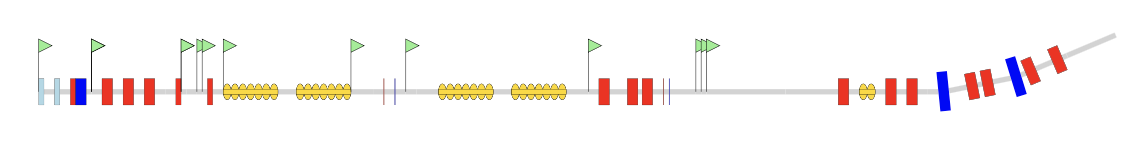

In [1]:
import IPython
import numpy
import time
import scipy
import matplotlib
import ocelot
print('ocelot:', ocelot.__version__)
from __future__ import print_function
%matplotlib inline
from ocelot import *
#from Ocelot graphical modules
from ocelot.gui.accelerator import *
#from DALI_lattice import *

initializing ocelot...
ocelot: 24.03.0


In [2]:
from DALI_lattice import *


0.7853981633974483 0.23561944901923448 0.19634954084936207
0.2617993877991494


In [3]:
# initialization of Twiss object
tws0 = Twiss()
# defining initial twiss parameters
tws0 = Twiss()
tws0.E       = 0.0055933376
tws0.emit_x  = 7.365138174912308e-07
tws0.emit_y  = 7.534879456221737e-07
tws0.beta_x  = 14.536983646893802
tws0.beta_y  = 14.193144329608034
tws0.alpha_x = 5.668202451983896
tws0.alpha_y = 5.532646004350875
tws0.gamma_x = 2.278912864000848
tws0.gamma_y = 2.2271436882043365
#


#Change RF parameters


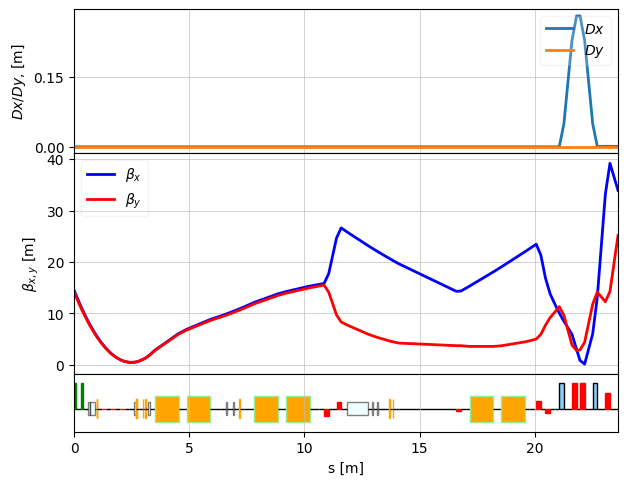

In [4]:
method = {"global": SecondTM}
#method = {"global": TransferMap}



phi=-4
LA1RC1.phi=phi; LA1RC2.phi=phi; LA2RC1.phi=phi; LA2RC1.phi=phi

CLARCH2.phi=-50;  CLARCH2.v=0.01
CLARCH1.phi=-50;  CLARCH1.v=0.01
#Q1L.k1=-3.5
TSIR_lat = MagneticLattice(TIR_cell, method=method)
twsSIR= twiss(TSIR_lat,tws0 )


# plot optical functions.
plot_opt_func(TSIR_lat, twsSIR, top_plot = ["Dx", "Dy"], legend=False, font_size=10)
plt.show()

In [5]:
# Tracking 100 k particle 

sc1 = SpaceCharge()
sc1.nmesh_xyz = [63, 63, 63]
sc1.step = 1

sc5 = SpaceCharge()
sc5.nmesh_xyz = [63, 63, 63]
sc5.step = 5

sc3 = SpaceCharge()
sc5.nmesh_xyz = [63, 63, 63]
sc5.step = 3


p_array_init = load_particle_array("injection_gun_beamm.npz")


navi = Navigator(TSIR_lat )

#add physics processes from the first element to the last of the lattice
navi.add_physics_proc(sc3, TSIR_lat.sequence[0], TSIR_lat.sequence[-1])


# definiing of unit step in [m]
navi.unit_step = 0.1

p_array = deepcopy(p_array_init)
start = time.time()
tws_track, p_array = track(TSIR_lat, p_array, navi)
print("\n time exec:", time.time() - start, "sec")

z = 23.611999999999995 / 23.611999999999995. Applied: paceChargeee
 time exec: 15.353279829025269 sec


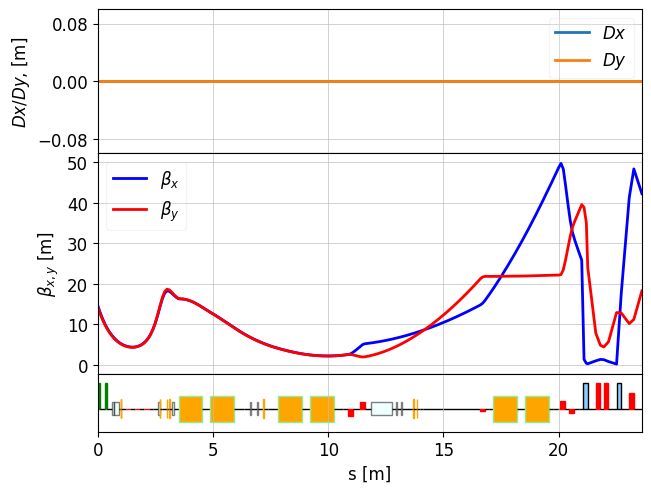

In [6]:
plot_opt_func(TSIR_lat, tws_track, top_plot=["Dx", "Dy"],fig_name=0, legend=False)
plt.show()

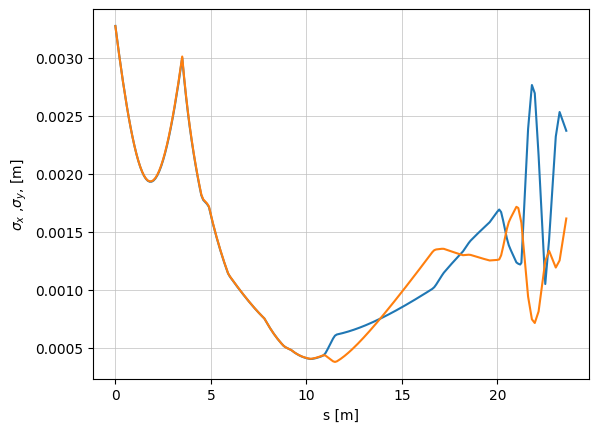

In [7]:
sigma_x = np.sqrt([tw.xx for tw in tws_track])
sigma_y = np.sqrt([tw.yy for tw in tws_track])
s = [tw.s for tw in tws_track]
plt.plot(s, sigma_x)
plt.plot(s, sigma_y)
plt.xlabel("s [m]")
plt.ylabel(r"$\sigma_x$ ,$\sigma_y$, [m]")
plt.show()


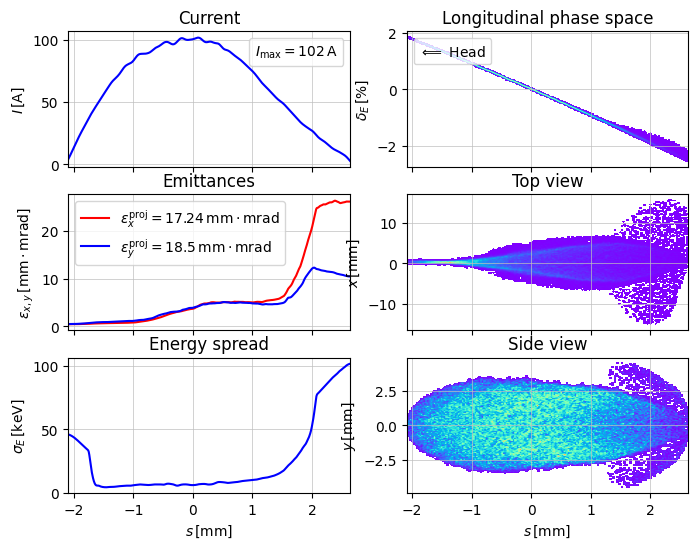

In [8]:
show_e_beam(p_array, figsize=(8,6))
plt.show()

# Second line

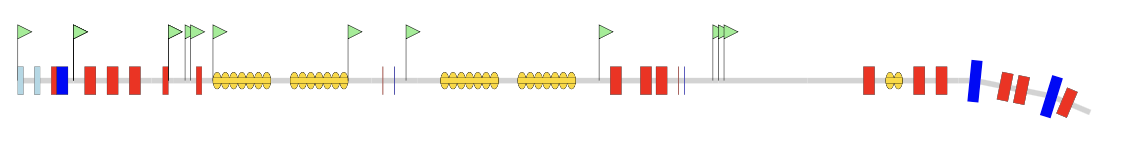

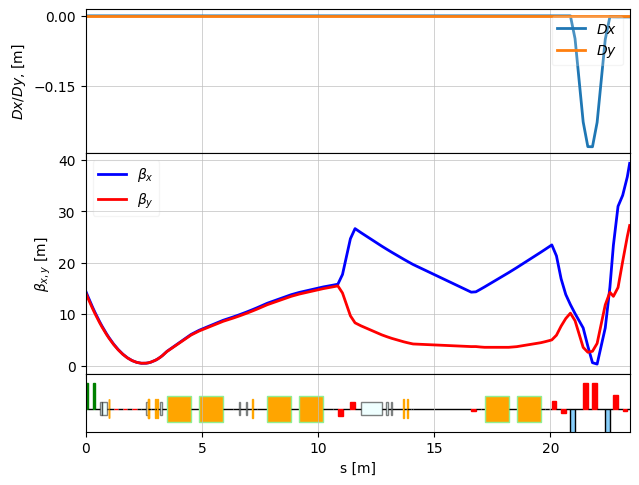

In [9]:

# first order optics 

TSIR_lat2= MagneticLattice(TIR_cell2, method=method)
twsSIR2= twiss(TSIR_lat2,tws0 )


plot_opt_func(TSIR_lat2, twsSIR2, top_plot = ["Dx", "Dy"], legend=False, font_size=10)
plt.show()

z = 23.411999999999992 / 23.411999999999992. Applied: SpaceChargee

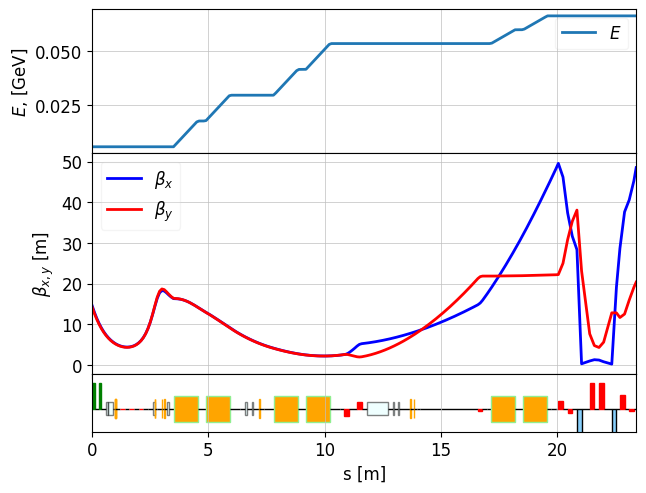

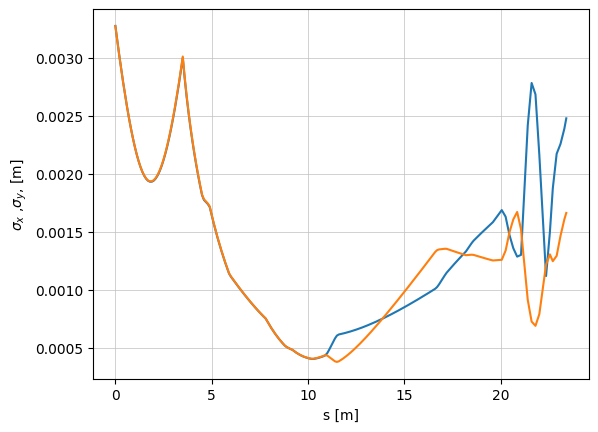

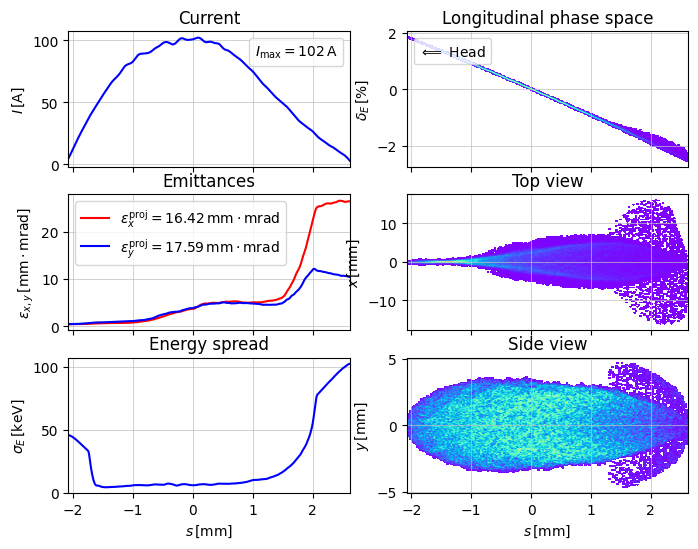

In [10]:
#tarcking 

navi = Navigator(TSIR_lat2 )
navi.add_physics_proc(sc3, TSIR_lat2.sequence[0], TSIR_lat2.sequence[-1])


# definiing of unit step in [m]
navi.unit_step = 0.1

p_array2 = deepcopy(p_array_init)
start = time.time()
tws_track2, p_array2 = track(TSIR_lat2, p_array2, navi)
plot_opt_func(TSIR_lat2, tws_track2, top_plot=["E"],fig_name=0, legend=False)
plt.show()


sigma_x = np.sqrt([tw.xx for tw in tws_track2])
sigma_y = np.sqrt([tw.yy for tw in tws_track2])
s = [tw.s for tw in tws_track2]
plt.plot(s, sigma_x)
plt.plot(s, sigma_y)
plt.xlabel("s [m]")
plt.ylabel(r"$\sigma_x$ ,$\sigma_y$, [m]")
plt.show()

show_e_beam(p_array2, figsize=(8,6))
plt.show()